# Movie Ratings

The dataset `ratings.csv` contains ratings of certain movies from certain users. Netflix want to build a non personalized stereotype-based Recommenders for its users. Suppose all they have is the above data. <b>You do not need to know a recommender system </b>. But help them to derive basic data processing for future recommendation.

In [4]:
# importing packages we will be using throughout the exam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Examining the Data Set

### Reading the dataset and find the number of users and the number of movies.

In [5]:
# Reading in our ratings.csv file and showing what we have
ratings = pd.read_csv('ratings.csv')
ratings.head()

,User,"Gender (1 =F, 0=M)",260: Star Wars: Episode IV - A New Hope (1977),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),1: Toy Story (1995),2028: Saving Private Ryan (1998),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,755,0,1.0,5.0,2.0,NaN,4.0,4.0,2.0,2.0,...,2.0,NaN,5.0,2.0,NaN,4.0,2.0,5.0,NaN,NaN
1,5277,0,5.0,3.0,NaN,2.0,4.0,2.0,1.0,NaN,...,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
2,1577,1,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,...,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
3,4388,0,NaN,3.0,NaN,NaN,NaN,1.0,2.0,3.0,...,NaN,4.0,1.0,3.0,5.0,NaN,5.0,1.0,1.0,2.0
4,1202,1,4.0,3.0,4.0,1.0,4.0,1.0,NaN,4.0,...,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN


In [6]:
# Finding the number of users:
# This is assuming that the 'User' column is not the total number of users in a group, 
# but instead are user ID numbers
num_usr = len(ratings.User)
print('The total number of users are: '+str(num_usr))


# Finding the number of movies:
# We are taking the column names of our 'ratings' data frame and only reading in the movie titles
movies = ratings.columns[2:]
print('The total number of movies are: '+ str(len(movies)))

The total number of users are: 20
The total number of movies are: 20


### Is there other information other than ratings?

Information we have that are not movie ratings are the User ID number (column called 'User'), and the users gender, in the second (or [1] for indexing in python) column where  1 = Female, 0 = Male

### Finding how many "NA" values are in the Dataset

In [9]:
num_nan = 0

# iterating over the length of our ratings data frame
for i in range(len(ratings)):
    
    # assigning when a Nan value is true for each column of our data
    true = np.isnan(ratings[ratings.columns[i+2]]) 
    
    # adding up the total nan values per column
    num_nan = num_nan + len(ratings[ratings.columns[i+2]][true]) 
    
print('The total number of NaN values are: '+str(num_nan))

The total number of NaN values are: 159


These Nan values are likely here due to the users not leaving a rating for a movie, or not watching a movie.

### Renaming the second column

In [14]:
# reading in the ratings dataframe to ensure that we do not overwrite our 
# changes if we run this cell more than once.
ratings = pd.read_csv('ratings.csv')

# This renames the second column name to simply 'Gender'
ratings = ratings.rename(columns={ratings.columns[1]:'Gender'})

# This is a one line function that returns 'Male' if the gender is asigned as 0
# and 'Female' if the gender is asigned as 1 in the newly named 'Gender' column
ratings['Gender'] = ratings['Gender'].apply(lambda x : 'Male' if x == 0 else 'Female')

# Showing the change
ratings.columns[1]

'Gender'

### Removing the number that appears in front of movie Names

In [15]:
def text_after(full_text, pattern):
    ''' Returns the text after the a desired pattern. This function removes everything
        from before the pattern and up to the actual pattern itself. It has a built in check
        that ensures that any string fed into the function that does NOT have the
        desired pattern is returned without any altercations.
    
    full_text : String, name of a movie for our example
    pattern : String, the part of the string that you want to remove, one may want to include
              spacing ' ' as apart of the pattern as well for a better result.
    '''
    
    # If there is no pattern in the string this returns the full text
    if len(pattern.join(full_text.split(pattern)[1:])) == 0:
        return(full_text)
    
    # This removes the text before the desired pattern
    else:
        return str(pattern.join(full_text.split(pattern)[1:]))

In [21]:
# Testing the function
print('Before-',ratings.columns[2])
      
print('After-',text_after(ratings.columns[2],': '))

Before- 260: Star Wars: Episode IV - A New Hope (1977)
After- Star Wars: Episode IV - A New Hope (1977)


In [22]:
columns_renamed = []

# A loop that replaces the names in all of the movie titles to remove the
# Xnum at the begining of the movie

for i in range(len(ratings.columns)):
    # appending the renamed columns
    columns_renamed.append(text_after(ratings.columns[i],': '))
    # applying the rename to the df
    ratings = ratings.rename(columns={ratings.columns[i]:columns_renamed[i]})

In [29]:
# Showing the changes
ratings.columns[2:].to_numpy()

array(['Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Silence of the Lambs, The (1991)', 'Gladiator (2000)',
       'Toy Story (1995)', 'Saving Private Ryan (1998)',
       'Pulp Fiction (1994)', 'Stand by Me (1986)',
       'Shakespeare in Love (1998)', 'Total Recall (1990)',
       'Independence Day (ID4) (1996)', 'Blade Runner (1982)',
       'Groundhog Day (1993)', 'Matrix, The (1999)',
       "Schindler's List (1993)", 'Sixth Sense, The (1999)',
       'Raiders of the Lost Ark (1981)', 'Babe (1995)'], dtype=object)

## Movie Reccomendations

Lets recommend the top 3 movies. Mention if there are any tie cases.

Suppose we want to recommend the users the top 3 movies which has the <b>highest average ratings</b> and <b>rating count</b> (number of raters)

### Displaying the top 3 movies, which has the highest average ratings by its raters along with their ratings.


In [30]:
# We are summing up the total number of ratings per movie and dividing by the 
# total number of ratings for that movie

# first we must separate the movie columns from the User and Gender columns
movies = ratings[ratings.columns[2:]]

rate_avg = []
for i in range(len(movies.T)):
    # defining our individual movie title as an array for easier use
    title = movies.columns[i]
    
    # finding the total number of ratings cast per movie
    len_true = np.logical_not(np.isnan(movies[title])) # ensuring we don't count Nan values
    len_ratings = len(movies[title][len_true])
    
    # finding the average scores of our movies
    total = movies[title].sum()
    rate_avg.append(total/len_ratings)

# converting our list to a numpy array for easier use
rate_avg = np.array(rate_avg)

In [31]:
# As we will be indexing the movies based on the top 3 highest scores, we only need 
# the top 3 scores and do not need any repeating values, so we will be using np.unique
# along with np.sort to scale our unique rating averages from highest to lowest
movie_avgs = -np.sort(np.unique(-rate_avg)) # ranking form highest to lowest (descending)

# finding the movie rankings
first = np.where(rate_avg==movie_avgs[0])
second = np.where(rate_avg==movie_avgs[1])
third = np.where(rate_avg==movie_avgs[2])

# printing first place
print('The movie that had the highest average rating is: ')
print(movies.columns[first[0][0]] + ', with the average rating of '+ 
      str(round(movie_avgs[0],2)))

# printing the second place
print('\nThe movie that came in second place is: ')
print(movies.columns[second[0][0]] + ', with the average rating of '+ 
      str(round(movie_avgs[1],2)))

# printing third place
print('\nThe movie that came in third place is: ')
print(movies.columns[third[0][0]] + ', with the average rating of '+ 
      str(round(movie_avgs[2],2)))

The movie that had the highest average rating is: 
Shawshank Redemption, The (1994), with the average rating of 3.6

The movie that came in second place is: 
Star Wars: Episode IV - A New Hope (1977), with the average rating of 3.27

The movie that came in third place is: 
Blade Runner (1982), with the average rating of 3.22


### Displaying the top 3 movies, which has the highest rating count along with their rating count.

We are just summing up the total number of ratings for each movie and displaying them in order

In [35]:
movies[movies.columns[0]].sum()

49.0

In [36]:
# We will sum up each of the ratings for the movie titles 
# and store into the array below
rate_count = []

for i in range(len(movies.T)):
    # defining our individual movie title as an array for easier use
    title = movies.columns[i]
    
    rate_count.append(np.sum(movies[title]))
    
# converting our list to a numpy array for easier use
rate_count = np.array(rate_count)

In [37]:
# Like we did for part a, we will be indexing the movies based on the top 3 highest 
# scores, as only need the top 3 scores and do not need repeating values, we will 
# be using np.unique along with np.sort to scale our unique ratings counts from 
# highest to lowest
movie_counts = -np.sort(np.unique(-rate_count)) # descending ranking

# finding the movie rankings
first = np.where(rate_count==movie_counts[0])
second = np.where(rate_count==movie_counts[1])
third = np.where(rate_count==movie_counts[2])

# printing first place
print('The highest rated movies tied for first place are: ')
print(movies.columns[first[0][0]]+' and '+movies.columns[first[0][1]]+ 
    ',\nwith the cumulative rating of '+ str(int(movie_counts[0])))

# printing the second place
print('\nThe movie that came in second place is: ')
print(movies.columns[second[0][0]] + ', with the cumulative rating of '+ 
      str(int(movie_counts[1])))

# printing third place
print('\nThe movie that came in third place is: ')
print(movies.columns[third[0][0]] + ', with the cumulative rating of '+ 
      str(int(movie_counts[2])))

The highest rated movies tied for first place are: 
Star Wars: Episode IV - A New Hope (1977) and Silence of the Lambs, The (1991),
with the cumulative rating of 49

The movie that came in second place is: 
Toy Story (1995), with the cumulative rating of 48

The movie that came in third place is: 
Star Wars: Episode VI - Return of the Jedi (1983), with the cumulative rating of 42


### Displaying the top 3 movies which has the highest percentages of 4+ ratings along with their percentages.

We are finding the total number of 4+ ratings for each movie, and dividing that by the total number of ratings that movie recieved to get the highest percentage rating  of 4+ ratings

In [38]:
four_plus_percentage = []

for i in range(len(movies.T)):
    # defining our individual movie title as an array for easier use
    title = movies.columns[i]
    
    # our appendexing array for movies that rank 4 and above
    true = movies[title] >= 4
    
    # movies that pass the condition of 4+ ratings
    four_plus = np.array(movies[title][true])
    
    # finding the total number of ratings cast per movie
    len_true = np.logical_not(np.isnan(movies[title])) # ensuring we don't count Nan values
    len_ratings = len(movies[title][len_true])
    
    # finding the percentage rating of 4+ ratings
    four_plus_percentage.append((len(four_plus)/len_ratings)*100)
    
four_plus_percentage=np.array(four_plus_percentage)

In [39]:
# Using the same process outlined in a and b
movie_percentage = -np.sort(np.unique(-four_plus_percentage)) # descending ranking

# finding the movie rankings
first = np.where(four_plus_percentage==movie_percentage[0])
second = np.where(four_plus_percentage==movie_percentage[1])
third = np.where(four_plus_percentage==movie_percentage[2])

# printing first place
print('The movie that had highest percentage of 4+ scores is: ')
print(movies.columns[first[0][0]] + ', with the 4+ rating score of '+ 
      str(round(movie_percentage[0],2))+ '%')

# printing the second place
print('\nThe movie that came in second place is: ')
print(movies.columns[second[0][0]] + ', with the 4+ rating score of '+ 
      str(round(movie_percentage[1],2))+ '%')

# printing third place
print('\nThe movie that came in third place is: ')
print(movies.columns[third[0][0]] + ', with the 4+ rating score of '+ 
      str(round(movie_percentage[2],2))+ '%')

The movie that had highest percentage of 4+ scores is: 
Shawshank Redemption, The (1994), with the 4+ rating score of 70.0%

The movie that came in second place is: 
Star Wars: Episode IV - A New Hope (1977), with the 4+ rating score of 53.33%

The movie that came in third place is: 
Gladiator (2000), with the 4+ rating score of 50.0%


## Examining the different rating systems

### Creating a dataframe with first column as movies and second column is the average ratings, rating counts and percentage of 4+ ratings.

In [40]:
# Creating the dataframe
data = {'Movies': movies.columns, 'Avg_ratings': rate_avg, 
        'Rating_counts': rate_count, '% of 4+ ratings':four_plus_percentage}

movie_scores = pd.DataFrame(data)

# Displaying the first 5 rows 
movie_scores.head()

,Movies,Avg_ratings,Rating_counts,% of 4+ ratings
0,Star Wars: Episode IV - A New Hope (1977),3.266667,49.0,53.333333
1,Star Wars: Episode VI - Return of the Jedi (1983),3.000000,42.0,35.714286
2,Forrest Gump (1994),2.700000,27.0,30.000000
3,"Shawshank Redemption, The (1994)",3.600000,36.0,70.000000
4,"Silence of the Lambs, The (1991)",3.062500,49.0,43.750000


#### Avg_ratings:
Average ratings describes the average score of a movie amongst those viewers who have watched and rated it. This is more of an indicator on the overall enjoyment of the movie.

#### Rating_counts:
Rating counts describes the cumulative score a movie has recieved, it could be understood that more "popular" movies would top this list. More specifically, popular movies with a <i>decent</i> enough rating could top this list.

#### % of 4+ ratings
Percent of 4+ ratings describes the percentage of viewers who have watched a movie and gave it a score of 4 or above. This is more of a determiner on how critically acclaimed a film is.

#### Recomendation
We would reccomend movies with a high <b>Average Rating</b> and a strong <b>Percent of 4+ Ratings</b> for new viewers. This is due to these movies likely being viewed as more entertainable and critically acclaimed, which could result in more engagement with the users. 

## Ratings between genders

### Separating ratings between genders

In [41]:
# We will begin by separating male and female users.

# creating our indexing arrays for Male and Female users
male_true = ratings['Gender']=='Male'
female_true = ratings['Gender']=='Female'

# Defining our own dataframes for Male and Female users
male = ratings[male_true]
female = ratings[female_true]

In [42]:
# Now we must determine how male and female users rated each movie. We will be using the same
# process as laid out in Question 2a

# first we must separate the movie columns from the User and Gender columns for our
# male directory
male_movies = male[male.columns[2:]]

male_avg = []
for i in range(len(male_movies.T)):
    # defining our individual movie title as an array for easier use
    title = male_movies.columns[i]
    
    # finding the total number of ratings cast per movie
    len_true = np.logical_not(np.isnan(male_movies[title])) # ensuring we don't count Nan values
    len_ratings = len(male_movies[title][len_true])
    
    # finding the average scores of our movies
    total = male_movies[title].sum()
    male_avg.append(total/len_ratings)

# converting our list to a numpy array for easier use
male_avg = np.array(male_avg)

In [43]:
# Now doing the same for our female directory

# first we must separate the movie columns from the User and Gender columns for our
# female directory
female_movies = female[female.columns[2:]]

female_avg = []
for i in range(len(female_movies.T)):
    # defining our individual movie title as an array for easier use
    title = female_movies.columns[i]
    
    # finding the total number of ratings cast per movie
    len_true = np.logical_not(np.isnan(female_movies[title])) # ensuring we don't count Nan values
    len_ratings = len(female_movies[title][len_true])
    
    # finding the average scores of our movies
    total = female_movies[title].sum()
    female_avg.append(total/len_ratings)

# converting our list to a numpy array for easier use
female_avg = np.array(female_avg)

In [44]:
# Now we can create our dataframe

data = {'Movies': movies.columns, 'Avg_male_ratings': male_avg, 'Avg_female_ratings': female_avg}

gender_ratings = pd.DataFrame(data)

# Displaying the first 5 rows 
gender_ratings.head()

,Movies,Avg_male_ratings,Avg_female_ratings
0,Star Wars: Episode IV - A New Hope (1977),3.125000,3.428571
1,Star Wars: Episode VI - Return of the Jedi (1983),3.000000,3.000000
2,Forrest Gump (1994),2.250000,3.000000
3,"Shawshank Redemption, The (1994)",3.400000,3.800000
4,"Silence of the Lambs, The (1991)",3.333333,2.714286


### Finding the difference in the mean ratings between gender for each movies

In [47]:
# Calculating the ratings difference
rating_diff = np.array(np.abs(gender_ratings.Avg_male_ratings - gender_ratings.Avg_female_ratings))

# Showing the results
rating_diff

array([0.30357143, 0.        , 0.75      , 0.4       , 0.61904762,
       0.16666667, 1.27142857, 0.39285714, 1.375     , 0.57142857,
       2.10714286, 0.48571429, 0.19047619, 0.5       , 0.66666667,
       0.74285714, 1.        , 0.33333333, 1.66666667, 1.42857143])

### Displaying how each gender rates graphically

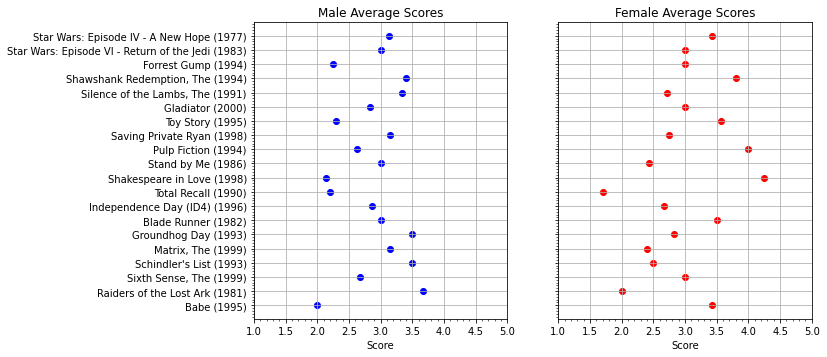

In [49]:
# Ensuring our Movie Titles are evenly spaced
ticks = np.arange(0,len(gender_ratings))

plt.figure(figsize=[10,12])
plt.tight_layout()

# Plotting the Male Average Scores
plt.subplot(221)
plt.scatter(gender_ratings.Avg_male_ratings,ticks,c='blue', label='Male Average Score')
plt.grid()
plt.minorticks_on()
plt.yticks(ticks=ticks,labels=movies.columns) # Movie titles on y-axis
plt.xlabel('Score')
plt.xticks(ticks=np.arange(1,5.5,.5))
plt.gca().invert_yaxis()
plt.title('Male Average Scores')

# Plotting the Female Average Scores
plt.subplot(222)
plt.scatter(gender_ratings.Avg_female_ratings,ticks,c='red', label='Female Average Score')
plt.grid()
plt.minorticks_on()
plt.xlabel('Score')
plt.xticks(ticks=np.arange(1,5.5,.5))
plt.yticks(ticks=ticks,labels=[])
plt.gca().invert_yaxis()
plt.title('Female Average Scores')

plt.show()

### Displaying the difference between genders graphicallly

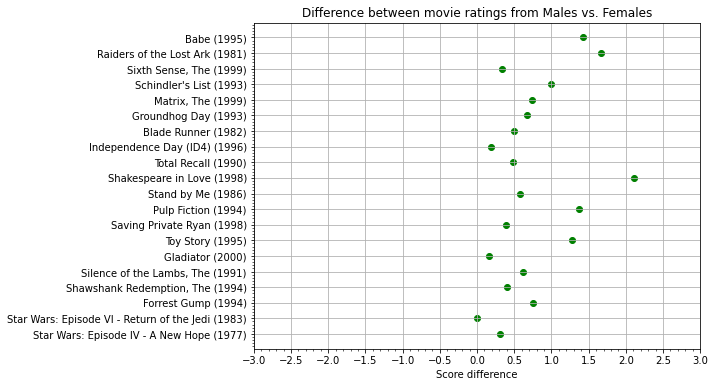

In [50]:
plt.figure(figsize=[8,6])
plt.scatter(rating_diff,ticks,c='green', label='Male Average Score')
plt.grid()
plt.minorticks_on()
plt.yticks(ticks=ticks,labels=movies.columns)
plt.xticks(ticks=np.arange(-3,3.5,.5))
plt.xlabel('Score difference')
plt.title('Difference between movie ratings from Males vs. Females')
plt.show()

It appears that Males seem to enjoy action and suspense movies more than females, while Females seem to enjoy romantic and wholesome movies more than males. While some of the more popular movies like Start Wars, Forrest Gump, and Independence Day have a very little scoring difference between genders.

### Displaying the top 3 movies with highest rating difference between genders.

As we are rating the differences <b>between genders</b> in this problem and not just from males vs females, we will be taking the absolute value of the difference to make this selection.

In [51]:
rating_diff = np.array(np.abs(gender_ratings.Avg_male_ratings - gender_ratings.Avg_female_ratings))

# ranking the difference in descending order
rating_diff_descend = -np.sort(np.unique(-rating_diff))

# finding the top 3 difference ratings
top1 = np.where(rating_diff==rating_diff_descend[0])
top2 = np.where(rating_diff==rating_diff_descend[1])
top3 = np.where(rating_diff==rating_diff_descend[2])

# printing movie with the largest differce
print('The movie that had the highest rating difference is: ')
print(movies.columns[top1][0] + ', with a rating difference of '+ 
      str(round(rating_diff_descend[0],2)))

# printing the second place
print('\nThe movie that had the second highest rating difference is: ')
print(movies.columns[top2][0] + ', with a rating difference of '+ 
      str(round(rating_diff_descend[1],2)))

# printing third place
print('\nThe movie that had the third highest rating difference is: ')
print(movies.columns[top3][0] + ', with a rating difference of '+ 
      str(round(rating_diff_descend[2],2)))

The movie that had the highest rating difference is: 
Shakespeare in Love (1998), with a rating difference of 2.11

The movie that had the second highest rating difference is: 
Raiders of the Lost Ark (1981), with a rating difference of 1.67

The movie that had the third highest rating difference is: 
Babe (1995), with a rating difference of 1.43


### Display the top 3 movies with lowest rating difference between genders.

Just as explained in part c), since we are rating the differences <b>between genders</b> in this problem and not just from males vs females, we will be taking the absolute value of the difference to make this selection.

In [52]:
rating_diff = np.array(np.abs(gender_ratings.Avg_male_ratings - gender_ratings.Avg_female_ratings))

# ranking the difference in ascending order
rating_diff_ascend = np.sort(np.unique(rating_diff))

# finding the bottom 3 difference ratings
bot1 = np.where(rating_diff==rating_diff_ascend[0])
bot2 = np.where(rating_diff==rating_diff_ascend[1])
bot3 = np.where(rating_diff==rating_diff_ascend[2])

# printing movie with the largest differce
print('The movie that had the lowest rating difference is: ')
print(movies.columns[bot1][0] + ', with a rating difference of '+ 
      str(round(rating_diff_ascend[0],2)))

# printing the second place
print('\nThe movie that had the second lowest rating difference is: ')
print(movies.columns[bot2][0] + ', with a rating difference of '+ 
      str(round(rating_diff_ascend[1],2)))

# printing third place
print('\nThe movie that had the third lowest rating difference is: ')
print(movies.columns[bot3][0] + ', with a rating difference of '+ 
      str(round(rating_diff_ascend[2],2)))

The movie that had the lowest rating difference is: 
Star Wars: Episode VI - Return of the Jedi (1983), with a rating difference of 0.0

The movie that had the second lowest rating difference is: 
Gladiator (2000), with a rating difference of 0.17

The movie that had the third lowest rating difference is: 
Independence Day (ID4) (1996), with a rating difference of 0.19


### Finding the % of rating 4+ separately for males and females. And display the top 3 movies with highest difference between genders.

In [53]:
# Using the same process as outlined in Question 2c

male_four_plus_percentage = []

for i in range(len(male_movies.T)):
    # defining our individual movie title as an array for easier use
    title = male_movies.columns[i]
    
    # our appendexing array for movies that rank 4 and above
    true = male_movies[title] >= 4
    
    # movies that pass the condition of 4+ ratings
    four_plus = np.array(male_movies[title][true])
    
    # finding the total number of ratings cast per movie
    len_true = np.logical_not(np.isnan(male_movies[title])) # ensuring we don't count Nan values
    len_ratings = len(male_movies[title][len_true])
    
    # finding the percentage rating of 4+ ratings
    male_four_plus_percentage.append((len(four_plus)/len_ratings)*100)
    
male_four_plus_percentage=np.array(male_four_plus_percentage)

In [54]:
# Showing our results for male % 4+ ratings
male_four_plus_percentage

array([50.        , 25.        ,  0.        , 60.        , 55.55555556,
       50.        , 20.        , 28.57142857, 25.        , 25.        ,
        0.        , 20.        , 28.57142857, 20.        , 50.        ,
       57.14285714, 50.        , 33.33333333, 50.        ,  0.        ])

In [55]:
# Now doing the same process for females while again using the same process as outlined in Question 2c

female_four_plus_percentage = []

for i in range(len(female_movies.T)):
    # defining our individual movie title as an array for easier use
    title = female_movies.columns[i]
    
    # our appendexing array for movies that rank 4 and above
    true = female_movies[title] >= 4
    
    # movies that pass the condition of 4+ ratings
    four_plus = np.array(female_movies[title][true])
    
    # finding the total number of ratings cast per movie
    len_true = np.logical_not(np.isnan(female_movies[title])) # ensuring we don't count Nan values
    len_ratings = len(female_movies[title][len_true])
    
    # finding the percentage rating of 4+ ratings
    female_four_plus_percentage.append((len(four_plus)/len_ratings)*100)
    
female_four_plus_percentage=np.array(female_four_plus_percentage)

In [56]:
# Showing our results for female % 4+ ratings
female_four_plus_percentage

array([57.14285714, 50.        , 50.        , 80.        , 28.57142857,
       50.        , 57.14285714, 50.        , 66.66666667, 42.85714286,
       75.        ,  0.        , 33.33333333, 75.        , 33.33333333,
       20.        , 16.66666667, 33.33333333,  0.        , 57.14285714])

In [57]:
# We will be using the same method as established before where we find the unnique votes votes
# listed from highest to lowest (descending order), and indexing where those unique votes occur
# to find what movies lie there, this will also help us determine tied rating scores.

# Calculating the difference
four_plus_percentage_diff = np.array(np.abs(male_four_plus_percentage - female_four_plus_percentage))

# ranking the difference in descending order
four_plus_percentage_descend = -np.sort(np.unique(-four_plus_percentage_diff))

# finding the bottom 3 difference ratings
top1 = np.where(four_plus_percentage_diff==four_plus_percentage_descend[0])
top2 = np.where(four_plus_percentage_diff==four_plus_percentage_descend[1])
top3 = np.where(four_plus_percentage_diff==four_plus_percentage_descend[2])

# printing movie with the largest differce
print('The movie that had the highest rating difference of 4+ ratings is: ')
print(movies.columns[top1][0] + ', with a rating difference of '+ 
      str(round(four_plus_percentage_descend[0],2)) + '%')

# printing the second place
print('\nThe movie that had the second highest rating difference of 4+ ratings is: ')
print(movies.columns[top2][0] + ', with a rating difference of '+ 
      str(round(four_plus_percentage_descend[1],2))+ '%')

# printing third place
print('\nThe movie that had the third highest rating difference of 4+ ratings is: ')
print(movies.columns[top3][0] + ', with a rating difference of '+ 
      str(round(four_plus_percentage_descend[2],2))+ '%')

The movie that had the highest rating difference of 4+ ratings is: 
Shakespeare in Love (1998), with a rating difference of 75.0%

The movie that had the second highest rating difference of 4+ ratings is: 
Babe (1995), with a rating difference of 57.14%

The movie that had the third highest rating difference of 4+ ratings is: 
Blade Runner (1982), with a rating difference of 55.0%


### Finding % of rating 4+ separately for males and females. And display the top 3 movies with lowest difference between genders.


In [58]:
# We will be using the same method as established before where we find the unnique votes votes
# listed from lowest to highest (ascending order), and indexing where those unique votes occur
# to find what movies lie there, this will also help us determine tied rating scores.

# Calculating the difference (using absolute value as it is more accurate)
four_plus_percentage_diff = np.array(np.abs(male_four_plus_percentage - female_four_plus_percentage))

# ranking the difference in ascending order
four_plus_percentage_ascend = np.sort(np.unique(four_plus_percentage_diff))

# finding the bottom 3 difference ratings
bot1 = np.where(four_plus_percentage_diff==four_plus_percentage_ascend[0])
bot2 = np.where(four_plus_percentage_diff==four_plus_percentage_ascend[1])
bot3 = np.where(four_plus_percentage_diff==four_plus_percentage_ascend[2])

# printing movie with the largest differce
print('The movies with the lowest rating difference of 4+ ratings are: ')
print(movies.columns[bot1][0] + ' and '+movies.columns[bot1][1] +
      ', with a rating difference of '+ 
      str(round(four_plus_percentage_ascend[0],2)) + '%')

# printing the second place
print('\nThe movie that had the second lowest rating difference of 4+ ratings is: ')
print(movies.columns[bot2][0] + ', with a rating difference of '+ 
      str(round(four_plus_percentage_ascend[1],2))+ '%')

# printing third place
print('\nThe movie that had the third lowest rating difference of 4+ ratings is: ')
print(movies.columns[bot3][0] + ', with a rating difference of '+ 
      str(round(four_plus_percentage_ascend[2],2))+ '%')

The movies with the lowest rating difference of 4+ ratings are: 
Gladiator (2000) and Sixth Sense, The (1999), with a rating difference of 0.0%

The movie that had the second lowest rating difference of 4+ ratings is: 
Independence Day (ID4) (1996), with a rating difference of 4.76%

The movie that had the third lowest rating difference of 4+ ratings is: 
Star Wars: Episode IV - A New Hope (1977), with a rating difference of 7.14%


## Recommendations

### Recommending the top 3 movies for someone who has seen Toy Story.

In [59]:
# Defining the toy story title for easier use
ts_title = ratings.columns[8]

# Finding the users who had given Toy Story a rating
rated_ts_true =np.logical_not(np.isnan(ratings[ts_title]))

# Creating a new DataFrame of only the people who have rated Toy Story
ts_raters = ratings[rated_ts_true]

In [60]:
# To find the most popular movies amongst these raters, we will be using the average
# movie score as our rating system. We will be using the same process as defined before

# Removing Toy Story from the list of movies we would be recomending
not_ts = ts_raters.drop(columns=(ts_title))

# separating the movie columns from that of the User and Gender columns
ts_movies = not_ts[not_ts.columns[2:]]

ts_avg = []
ts_count = []
for i in range(len(ts_movies.T)):
    # defining our individual movie title as an array for easier use
    title = ts_movies.columns[i]
    
    # finding the total number of ratings cast per movie
    len_true = np.logical_not(np.isnan(ts_movies[title])) # ensuring we don't count Nan values
    len_ratings = len(ts_movies[title][len_true])
    
    # finding the average scores of our movies
    total = ts_movies[title].sum()
    ts_avg.append(total/len_ratings)

    # Finding the total counts of each movie
    ts_count.append(np.sum(ts_movies[title]))
    
# converting our list to a numpy array for easier use
ts_count = np.array(ts_count)
    
# converting our list to a numpy array for easier use
ts_avg = np.array(ts_avg)

In [61]:
# Displaying the top 3 enjoyed movies for those who have watched toy story using the
# average rating process we have done above

# Ranking in descending order
ts_scores = -np.sort(np.unique(-ts_avg))

# finding the movie rankings
first = np.where(ts_avg==ts_scores[0])
second = np.where(ts_avg==ts_scores[1])
third = np.where(ts_avg==ts_scores[2])

# printing first place
print('The movie that had the highest average rating of people who have watched Toy Story is: ')
print(movies.columns[first[0][0]] + ', with the average rating of '+ 
      str(round(ts_scores[0],2)))

# printing the second place
print('\nThe movie that came in second place of people who have watched Toy Story is: ')
print(movies.columns[second[0][0]] + ', with the average rating of '+ 
      str(round(ts_scores[1],2)))

# printing third place
print('\nThe movie that came in third place of people who have watched Toy Story is: ')
print(movies.columns[third[0][0]] + ', with the average rating of '+ 
      str(round(ts_scores[2],2)))

The movie that had the highest average rating of people who have watched Toy Story is: 
Shawshank Redemption, The (1994), with the average rating of 4.25

The movie that came in second place of people who have watched Toy Story is: 
Star Wars: Episode IV - A New Hope (1977), with the average rating of 3.21

The movie that came in third place of people who have watched Toy Story is: 
Silence of the Lambs, The (1991), with the average rating of 3.15


## Movie Correlations

Following is the definition of the sample correlation between two n dimensional sample vectors $x = [x_1,...,x_n]$ and $y = [y_1,...,y_n]$.

\begin{equation}
    cor(x,y) = \frac{\sum_{i=1}^{n} x[i]y[i] - n \cdot \bar{x}\bar{y}}{n \cdot sd(x)sd(y)}
\end{equation}

where $\bar{x}$, $\bar{y}$ represents the average values of x and y vectors and sd(x) and sd(y) represents standard deviation for x and y respectively.

### Writing a function to calculate sample correlation 

In [62]:
def cor(x ,y):
    ''' Sample Correlation function between two 
    n dimensional sample vectors.
    
    x : array, n dimensional (same n as y)
    y : array, n dimensional (same n as x)
    '''
    
    n = len(x) # or len(y), so long as x and y are the same length

    # defining the average values of x and y
    x_bar = np.sum(x)/len(x)
    y_bar = np.sum(y)/len(y)
    
    # defining the standard deviation for x and y
    sd_x = np.std(x)
    sd_y = np.std(y)
    
    top = np.sum(x * y) - (n * x_bar * y_bar)
    bot = n * sd_x * sd_y
    
    return(top/bot)

### Finding the correlation between the ratings of Toy story and ratings of Forrest Gump
(Again remove the NA ’s.)

In [63]:
# Defining the titles for our two samples
ts_title = ratings.columns[8]
fg_title = ratings.columns[4]

# Selecting the data from only our two samples
ts_ratings = ratings[ts_title]
fg_ratings = ratings[fg_title]

# As our x and y arrays have to share the same length, we must 
# remove everyone who left a nan value for EITHER Toy Story OR
# Forest Gump

# Appendexing where the Nan values are for each sample
ts_true = np.logical_not(np.isnan(ts_ratings))
fg_true = np.logical_not(np.isnan(fg_ratings))

# Finding where BOTH toy story and forrest gump are True
both_true = []
for i in range(len(ts_true)):
    if ts_true[i] == fg_true[i]:
        both_true.append(ts_true[i])
    else:
        both_true.append(False)
        
# Appendexing out our true sample
ts_ratings = ts_ratings[both_true]
fg_ratings = fg_ratings[both_true]

In [64]:
# finding the correlation between people who watched Forest Gump 
# and people who watched Toy Story
fg_ts_corr = cor(fg_ratings,ts_ratings)
print('The correlation between people who watch Forest Gump and '+
     'people who watch toy story is: '+str(round(fg_ts_corr,3)))

The correlation between people who watch Forest Gump and people who watch toy story is: 0.523


### Finding the top 3 movies having the highest correlation with the ratings of Toy Story

In [65]:
# First we must ensure we are using the same data we did in part b
ts_title = ratings.columns[8]
ts_rating = ratings[ts_title]
ts_true = np.logical_not(np.isnan(ts_rating))

# Removing Toy Story from the list of movies we will be checking
no_ts_movies = movies.drop(columns=(ts_title))

correlation = []
for i in range(len(no_ts_movies.T)):
    both_true = []
    # Defining the movie title for easier use
    movie_title = no_ts_movies.columns[i]
    
    # Appendexing where the Nan values are for our other movie sample
    movie_true = np.logical_not(np.isnan(no_ts_movies[movie_title]))
    
    # Finding where BOTH ts and each movie are True
    for j in range(len(movie_true)):
        if movie_true[j] == ts_true[j]:
            both_true.append(movie_true[j])
        else:
            both_true.append(False)
    
    # Appendexing the ratings of movies that have overlapping viewers
    movie_ratings = no_ts_movies[movie_title][both_true]
    ts_ratings = ts_rating[both_true]
    
    correlation.append(cor(movie_ratings,ts_ratings))

In [66]:
# Displaying the top 3 enjoyed movies for those who have watched toy story using the
# same process as defined above

# Ranking in descending order
correlation_order = -np.sort(np.unique(-np.array(correlation)))

# finding the movie rankings
first = np.where(correlation==correlation_order[0])
second = np.where(correlation==correlation_order[1])
third = np.where(correlation==correlation_order[2])

# printing first place
print('The movie that had the highest ratings correlation with Toy Story is: ')
print(no_ts_movies.columns[first[0][0]] + ', with a strong correlation of '+ 
      str(round(correlation_order[0],2)))

# printing the second place
print('\nThe movie that had the second highest ratings correlation with Toy Story is: ')
print(no_ts_movies.columns[second[0][0]] + ', with a strong correlation of '+ 
      str(round(correlation_order[1],2)))

# printing third place
print('\nThe movie that had the third highest ratings correlation with Toy Story is: ')
print(no_ts_movies.columns[third[0][0]] + ', with a strong correlation of '+ 
      str(round(correlation_order[2],2)))

The movie that had the highest ratings correlation with Toy Story is: 
Shawshank Redemption, The (1994), with a strong correlation of 0.89

The movie that had the second highest ratings correlation with Toy Story is: 
Babe (1995), with a strong correlation of 0.81

The movie that had the third highest ratings correlation with Toy Story is: 
Pulp Fiction (1994), with a strong correlation of 0.71
